# Importing Required Files

In [36]:
import pandas as pd, numpy as np, math, glob, os, cv2, matplotlib.pyplot as plt
import csv, cv2, numpy as np, pandas as pd, matplotlib.pyplot as plt, string, PIL, keras, pymysql
from sklearn.feature_extraction.image import extract_patches_2d
import collections, time, pickle, glob, os, cv2, os.path, math
from keras.models import load_model,model_from_json
from collections import OrderedDict, Counter
from skimage.transform import resize
from sklearn.externals import joblib
from sklearn import preprocessing
from skimage.feature import hog
from fuzzywuzzy import process
from scipy.stats import boxcox
from PIL import ImageEnhance
from fuzzywuzzy import fuzz
from pandasql import sqldf
from scipy import ndimage
from PIL import Image
from os import walk
#import MySQLdb
import fuzzywuzzy
import warnings
warnings.filterwarnings('ignore')

# CSV FILE

In [37]:
df = pd.read_excel('/home/Sandeep/Bagic_field_dimensions.xlsx')

# GRID REMOVAL AUTOMATION

In [4]:
# for image_path in glob.glob(os.path.join('/KALpydev/new_Cropped/','*/*/*.jpg')):
#     img = cv2.imread(image_path,0)

#     if img is not None:
#         aname=image_path.split('/')[3].split('.')[0]
#         print(aname)
#         bname=image_path.split('/')[4].split('.')[0]
#         print(bname)
#         fname=image_path.split('/')[5].split('.')[0]
#         print(fname)
#         plt.figure(figsize=(12,12));plt.imshow(img);plt.show()
#         try:
#             kernel = np.ones(df.loc[df['FieldName']=="'"+fname+"'"]['Dilation'], np.uint8)
#     #             kernel = np.ones((4,3), np.uint8)
#             overlay = cv2.dilate(img, kernel, iterations = 1)
#             kernel1 = np.ones(df.loc[df['FieldName']=="'"+fname+"'"]['Erosion'], np.uint8)
#     #             kernel1 = np.ones((4,3),np.uint8)
#             overlay = cv2.erode(overlay,kernel1,iterations = 1)
#         except:
#             pass
#         #cv2.imwrite("/home/Sandeep/something1.jpg", overlay)
#         #overlay = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
#         overlay = cv2.threshold(overlay,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
#         overlay = overlay[int(overlay.shape[0]*0.1):int(overlay.shape[0]*0.9),:]
#         #cv2.imwrite('/home/Arjun/files/'+fname+'.jpg', overlay)
#         #print(overlay.shape)
#         plt.imshow(overlay);plt.show()
#         a = []
#         for i in range(overlay.shape[1]):
#             try:
#                 if overlay[int(overlay.shape[0]*0.5),i]==0 and overlay[int(overlay.shape[0]*0.5),i+1]==0 and overlay[int(overlay.shape[0]*0.5),i+2]==0:
#                     a.append(i)
#             except IndexError:
#                 pass




#         which = image_path.split('/')[4].split('.')[0]

#         if len(a)!=0:
#             if which == "Alpha Numeric":
#                 for i in df.loc[df['FieldName']==fname]['Step']:
#                     for each in np.arange(start=a[0], stop=overlay.shape[1],step=i):
#                         try:
#                             for j in df.loc[df['FieldName']==fname]['GridWidth']:
#                                 overlay[:,each:each+j] = np.ones((overlay.shape[0],j), dtype=int)*255
#                         except :
#                             pass
#             else:
#                 for i in df.loc[df['FieldName']==fname]['Step']:
#                     for each in np.arange(start=a[0], stop=overlay.shape[1],step=i):
#                         try:
#                             for j in df.loc[df['FieldName']==fname]['GridWidth']:
#                                 overlay[:,each:each+j] = np.ones((overlay.shape[0],j), dtype=int)*255
#                         except :
#                             pass
#         plt.figure(figsize=(12,12));plt.imshow(overlay);plt.show()

#     #kernel = np.ones((3,1), np.uint8)
# #         kernel = np.ones((2,5), np.uint8)
# #         overlay = cv2.erode(overlay, kernel, iterations = 1)
#     #kernel1 = np.ones((3,1),np.uint8)
#     #kernel1 = np.ones((4,3),np.uint8)
#     #overlay = cv2.erode(overlay,kernel1,iterations = 1)
#     print('/home/Sandeep/'+aname+'_WithoutGrid/'+bname+'/'+fname+'.jpg')
    
#     dirname = '/home/Sandeep/Without_Grid/'+aname+'_WithoutGrid/'+bname
#     import os
#     if not os.path.exists(dirname):
#         os.makedirs(dirname)
#     #os.mkdir(dirname)
#     cv2.imwrite(os.path.join(dirname,fname+'.jpg'), overlay)

#     #print(a)

# CHARACTER EXTRACTION

In [44]:
kantareddydef character_extraction(character_file, dico, model_char):
    im = cv2.imread(character_file,0)
    
    if im is not None:
        im1=im.copy()
        plt.imshow(im1)
        plt.show()
        #blur=cv2.GaussianBlur(im1,(13,13),0)
        
        #Thresholding Image
        ref = cv2.threshold(im1, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        #print('ref',ref)
        mask = np.zeros_like(ref)
#         plt.imshow(mask)
#         plt.show()
        #print('mask',mask)
        w = ref.shape[1]
        #print(w)
        shp = round(w * 0.15)
        #print(shp)
        if shp % 2 == 0:
            
            shp = shp + 1
            #print(shp)

        kr = cv2.getStructuringElement(cv2.MORPH_RECT,(shp,1))
        er = cv2.erode(ref, kr, 1)
        kr = cv2.getStructuringElement(cv2.MORPH_RECT,(shp,1))
        dl = cv2.dilate(er, kr, 1)
        OriImg2 = im.copy()
        img = dl
        OrimgCopy = dl
        added= cv2.add(cv2.bitwise_not(ref), dl)
#         plt.imshow(added)
#         plt.show()
        
        (_, cnts, _) = cv2.findContours(cv2.bitwise_not(added).copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        cnts1 = [c for c in cnts if cv2.contourArea(c) < round(w*0.20)]    
        for c in cnts1:
            cv2.drawContours(mask, [c], -1, 255, 2)
        plt.imshow(mask)
        plt.show()
        img_output = cv2.bitwise_not(cv2.add(added,mask))
        plt.imshow(img_output)
        plt.show()

    
        # For finding the contours
        
        img,ctrs,hier = cv2.findContours(img_output.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE )
        
        #Contour Area
        #print(ctrs)
        
#         areas = [cv2.contourArea(ctr) for ctr in ctrs]
#         mean = np.mean(areas)
#         x = 0
#         i = []
        
        
#         # For Contour Area 
        
#         for area in areas:
#             if area < (0.50 * mean):
#                 i.extend([x])
#                 x=x+1
#             else:
#                 x=x+1
        
#         print(area)
        # Finding bounding rectangles 
        
        rects = [cv2.boundingRect(ctr) for ctr in ctrs]
        #print("rects", rects)

        # Making it into an ARRAY
        rect2 = np.array(rects, 'int')
        #print("rect2", rect2.shape)
        col = 0
    
        # Sorting the list
        
        try:
            rect2 = rect2[np.argsort(rect2[:,col])]
        except IndexError:
            rect2 = rects
            
        #print(rect2)
        li = []
        s=""
#         plt.imshow(rect2)
#         plt.show()
        O_copy = OriImg2.copy()
        d={}
        cnt = 0
        
        # For drawing the rectangle 
        
        for j,rect in enumerate(rect2):
            leng = int(rect[3] * 1.05)
            pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
            pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
            #print(leng,pt1,pt2)
            roi = OriImg2[pt1:pt1+leng, pt2:pt2+leng]
#             plt.imshow(roi)
#             plt.show()
            newroi=OriImg2[rect[1]:rect[1]+rect[3],rect[0]:rect[0]+rect[2]]
#             plt.imshow(newroi)
#             plt.show()
            a_str=''
            if roi.shape[0] >= 28 and roi.shape[1] >= 28:
                roi = cv2.resize(roi, (28, 28), cv2.INTER_AREA)
                newroi = cv2.resize(newroi, (28, 28), cv2.INTER_AREA)
#                 plt.imshow(roi)
#                 plt.show()
#                 plt.imshow(newroi)
#                 plt.show()
                ret1, im_th1 = cv2.threshold(roi, 190, 255, cv2.THRESH_BINARY)
                img = im_th1.astype('float32')
                img = resize(img, (28,28), order=1, preserve_range=True)
                img = img/255
                img = resize(ones_padding(img), (28,28), order=1, preserve_range=True)
                img = img.reshape((1,28,28,1))

                a_str = model_char.predict_classes(img)
                #print('str',a_str)
                a_str = string.ascii_uppercase[a_str[0]]
                #print(a_str)
                d[cnt] = rect[0]
                cnt=cnt+1
#             print('d', d)
            s += str(a_str)
        data=['Path','Character','Image_Name','Prediction']
        with open('/home/Sandeep/name.csv','a',newline='') as f:
            writer=csv.writer(f,delimiter=',')
            writer.writerow([image_path.split('/')[4].split('.')[0],image_path.split('/')[5].split('.')[0],image_path.split('/')[6].split('.')[0],s])
            f.close()
        x = list(d.values())
        if (len(x)>=3):
            y=[x[i+1]-x[i] for i in range(len(x)-1)]
            s1 = s[0:(np.argmax(y)+1)]+' '+s[(np.argmax(y)+1):]    
        else:
            s1 = s
        return s1
# j=[]
# h=[]
# img=overlay
# for i in range(img.shape[0]):
#     h.append(img[i,:].sum())
# for i in range(img.shape[0]):
#     if img[i,:].sum()<0.80*max(h):
#         j.append(i)
# # print(c)
# for i in j:
#     img[i,:]=np.ones((1,img.shape[1]),dtype=int)*255

# plt.figure(figsize=(16,16))
# plt.imshow(img)
# plt.show()

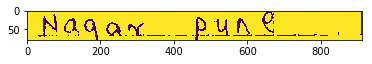

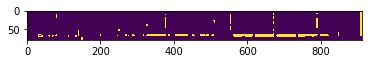

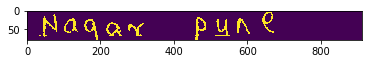

'NAQQY BYNF'

In [45]:
character_extraction('/home/Sandeep/something1.jpg', dico, model_char)

In [46]:
model_char = load_model("/KALpydev/icr_pickle_files/CNN_Model/Character/CNN_Model_v2.h5")
with open("/KALpydev/icr_pickle_files/dictionary.p","rb") as f: 
        V, dico = pickle.load(f, encoding='latin1')

In [47]:
def ones_padding(x):
    y=np.ones([32,32])
    y[2:30,2:30]=x
    return(y)

In [48]:
json_file = open('/KALpydev/icr_pickle_files/CNN_Model/model_alpha9.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model_alphanum = model_from_json(loaded_model_json)
model_alphanum.load_weights("/KALpydev/icr_pickle_files/CNN_Model/model_alpha9.h5")

# NUMERIC EXTRACTION

In [59]:
def numeric_extraction(numeric_file, dico, model_numm):
    print(numeric_file)
    im = cv2.imread(numeric_file,0)
    if im is not None:
        im1=im.copy()
        plt.imshow(im1)
        plt.show()
        ref = cv2.threshold(im1, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        mask = np.zeros_like(ref)
#         plt.imshow(mask)
#         plt.show()
        w = ref.shape[1]
        shp = round(w * 0.15)
        if shp % 2 == 0:
            shp = shp + 1
        kr = cv2.getStructuringElement(cv2.MORPH_RECT,(shp,1))
        er = cv2.erode(ref, kr, 1)
        kr = cv2.getStructuringElement(cv2.MORPH_RECT,(shp,1))
        dl = cv2.dilate(er, kr, 1)
        OriImg2 = im.copy()
        img = dl
        OrimgCopy = dl
        added= cv2.add(cv2.bitwise_not(ref), dl)
#         plt.imshow(added)
#         plt.show()
        (_, cnts, _) = cv2.findContours(cv2.bitwise_not(added).copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        cnts1 = [c for c in cnts if cv2.contourArea(c) < round(w*0.05)]    
        for c in cnts1:
            cv2.drawContours(mask, [c], -1, 255, 2)
        plt.imshow(mask)
        plt.show()
        img_output = cv2.bitwise_not(cv2.add(added,mask))
        plt.imshow(img_output)
        plt.show()
        img,ctrs,hier = cv2.findContours(img_output.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#         areas = [cv2.contourArea(ctr) for ctr in ctrs]
#         mean = np.mean(areas)
#         x = 0
#         i = []
#         cv2.imwrite('/home/New folder/image.jpg',img)
#         for area in areas:
#             if area < (0.50 * mean):
#                 i.extend([x])
#                 x=x+1
#             else:
#                 x=x+1
        rects = [cv2.boundingRect(ctr) for ctr in ctrs]
    #         print("rects", rects)
        rect2 = np.array(rects, 'int')
    #         print("rect2", rect2.shape)
        col = 0
        try:
            rect2 = rect2[np.argsort(rect2[:,col])]
        except IndexError:
            rect2 = rects
        li = []
        s=""
        O_copy = OriImg2.copy()
        d={}
        cnt = 0
        #cv2.imwrite('/home/New folder/image1.jpg',O_copy)
        for j,rect in enumerate(rect2):
            leng = int(rect[3] * 1.05)
            pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
            pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
            #print(leng,pt1,pt2)
            roi = OriImg2[pt1:pt1+leng, pt2:pt2+leng]
#             plt.imshow(roi)
#             plt.show()
            newroi=OriImg2[rect[1]:rect[1]+rect[3],rect[0]:rect[0]+rect[2]]
#             plt.imshow(newroi)
#             plt.show()
            a_str=''
            if roi.shape[0] >= 28 and roi.shape[1] >= 28:
                roi = cv2.resize(roi, (28, 28), cv2.INTER_AREA)
                newroi = cv2.resize(newroi, (28, 28), cv2.INTER_AREA)
#                 plt.imshow(roi)
#                 plt.show()
#                 plt.imshow(newroi)
#                 plt.show()
                ret1, im_th1 = cv2.threshold(roi, 190, 255, cv2.THRESH_BINARY)
                img = im_th1.astype('float32')
                img = resize(img, (28,28), order=1, preserve_range=True)
                img = img/255
                img = resize(ones_padding(img), (28,28), order=1, preserve_range=True)
                img = img.reshape((1,28,28,1))
                a_str = model_numm.predict_classes(img)
    #                 print('Prediction')
    #                 print(a_str)
    #                 print('\n#############\n') 
            s+=str(a_str)
        s=s.replace('[','').replace(']','')
        with open('/home/Sandeep/name.csv','a',newline='') as f:
            writer=csv.writer(f,delimiter=',')
            writer.writerow([image_path.split('/')[4].split('.')[0],image_path.split('/')[5].split('.')[0],image_path.split('/')[6].split('.')[0],s])
            f.close()
        #print(s)
        return s

/home/Sandeep/Without_Grid/87395726_WithoutGrid/Numeric/Pincode.jpg


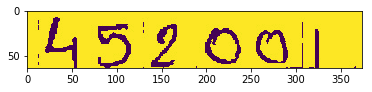

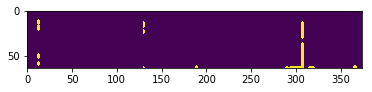

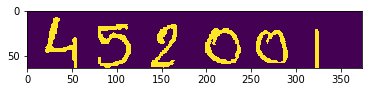

'458001'

In [62]:
numeric_extraction('/home/Sandeep/Without_Grid/87395726_WithoutGrid/Numeric/Pincode.jpg', dico, model_numm)

In [51]:
 model_numm = load_model("/KALpydev/icr_pickle_files/CNN_Model/Numeric/CNN_Model_v2.h5")

In [1]:
# for image_path in glob.glob(os.path.join('/home/Sandeep/','*/*/*/*.jpg')):
#     bname=image_path.split('/')[5].split('.')[0]
#     if  bname=='Numeric':
#         print(numeric_extraction(image_path, dico, model_numm))

In [2]:
# for image_path in glob.glob(os.path.join('/home/Sandeep/','*/*/*/*.jpg')):
#     bname=image_path.split('/')[5].split('.')[0]
#     #print(bname)
#     if  bname=='Numeric':
#         print(numeric_extraction(image_path, dico, model_numm))
#     if  bname=='Alpha Numeric':
#         try:
#             print(alphanumeric_extraction(image_path, dico, model_alphanum))
#         except:
#             pass
#     if  bname=='Character':
#         print(character_extraction(image_path, dico, model_char))
        

In [52]:
def decode_class(s):
    if s in [i for i in range(10)]:
        return(str(s[0]))
    elif s==10:
        return('A')
    elif s==11:
        return('@')
    elif s==12:
        return('B')
    elif s==13:
        return('C')
    elif s==14:
        return('D')
    elif s==15:
        return('E')
    elif s==16:
        return('F')
    elif s==17:
        return('G')
    elif s==18:
        return('H')
    elif s==19:
        return('I')
    elif s==20:
        return('J')
    elif s==21:
        return('K')
    elif s==22:
        return('L')
    elif s==23:
        return('M')
    elif s==24:
        return('N')
    elif s==25:
        return('O')
    elif s==26:
        return('P')
    elif s==27:
        return('Q')
    elif s==28:
        return('R')
    elif s==29:
        return('Rs.')
    elif s==30:
        return('S')
    elif s==31:
        return('T')
    elif s==32:
        return('U')
    elif s==33:
        return('V')
    elif s==34:
        return('W')
    elif s==35:
        return('X')
    elif s==36:
        return('Y')
    elif s==37:
        return('Z')

# ALPHANUMERIC EXTRACTION

In [53]:
def alphanumeric_extraction(character_file, dico, model_alphanum):
    im = cv2.imread(character_file,0)
    if im is not None:
        im1=im.copy()
        plt.imshow(im1)
        plt.show()
        ref = cv2.threshold(im1, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        mask = np.zeros_like(ref)
#         plt.imshow(mask)
#         plt.show()
        w = ref.shape[1]
        shp = round(w * 0.15)
        if shp % 2 == 0:
            shp = shp + 1
        kr = cv2.getStructuringElement(cv2.MORPH_RECT,(shp,1))
        er = cv2.erode(ref, kr, 1)
        kr = cv2.getStructuringElement(cv2.MORPH_RECT,(shp,1))
        dl = cv2.dilate(er, kr, 1)
        OriImg2 = im.copy()
        img = dl
        OrimgCopy = dl
        added= cv2.add(cv2.bitwise_not(ref), dl)
#         plt.imshow(added)
#         plt.show()
        (_, cnts, _) = cv2.findContours(cv2.bitwise_not(added).copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        cnts1 = [c for c in cnts if cv2.contourArea(c) < round(w*0.05)]    
        for c in cnts1:
            cv2.drawContours(mask, [c], -1, 255, 2)
        plt.imshow(mask)
        plt.show()
        img_output = cv2.bitwise_not(cv2.add(added,mask))
        plt.imshow(img_output)
        plt.show()
        img,ctrs,hier = cv2.findContours(img_output.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#         areas = [cv2.contourArea(ctr) for ctr in ctrs]
#         mean = np.mean(areas)
#         x = 0
#         i = []
#         cv2.imwrite('/home/New folder/image.jpg',img)
#         for area in areas:
#             if area < (0.50 * mean):
#                 i.extend([x])
#                 x=x+1
#             else:
#                 x=x+1
        rects = [cv2.boundingRect(ctr) for ctr in ctrs]
    #         print("rects", rects)
        rect2 = np.array(rects, 'int')
    #         print("rect2", rect2.shape)
        col = 0
        try:
            rect2 = rect2[np.argsort(rect2[:,col])]
        except IndexError:
            rect2 = rects
        li = []
        s=""
        O_copy = OriImg2.copy()
        d={}
        cnt = 0
        #cv2.imwrite('/home/New folder/image1.jpg',O_copy)
        for j,rect in enumerate(rect2):
            leng = int(rect[3] * 1.05)
            pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
            pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
            #print(leng,pt1,pt2)
            roi = OriImg2[pt1:pt1+leng, pt2:pt2+leng]
        for j,rect in enumerate(rect2):
            #newImg = cv2.rectangle(O_copy, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3)
#             newImg2 = cv2.bitwise_not(newImg1) 
            leng = int(rect[3] * 1.05)
            pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
            pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
            roi = OriImg2[pt1:pt1+leng, pt2:pt2+leng]

#             print('ROI')
#             plt.imshow(roi)
#             plt.show()
            a_str=''
            if roi.shape[0] >= 28 and roi.shape[1] >= 28:
                
#                 roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
                roi = cv2.resize(roi,(28,28))
                roi = np.array(roi)
                roi = roi.astype('float32')
                roi /= 255
                        #print (test_image.shape)
                roi = np.expand_dims(roi, axis=0)
                img = np.expand_dims(roi, axis=0)
                
#                 roi = cv2.resize(roi, (28, 28), cv2.INTER_AREA)

# #                 print('ROI-After Resizing')
# #                 plt.imshow(roi)
# #                 plt.show()
# #                     ret1, im_th1 = cv2.threshold(roi, 127, 255, cv2.THRESH_BINARY_INV)
#                 img = im_th1.astype('float32')
#                 img = 255-img
#                 img = img/255
#                 img = img.reshape((1,1,28,28))

                a_str = model_alphanum.predict_classes(img)
                a_str = str(decode_class(a_str))
#                 print(a_str[0])
                #a_str = string.ascii_uppercase[a_str[0]]
            s += str(a_str)
        with open('/home/Sandeep/name.csv','a',newline='') as f:
            writer=csv.writer(f,delimiter=',')
            writer.writerow([image_path.split('/')[4].split('.')[0],image_path.split('/')[5].split('.')[0],image_path.split('/')[6].split('.')[0],s])
            f.close()
        #print(s, decode_class(s))
        return s

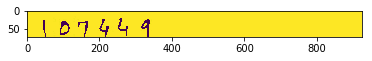

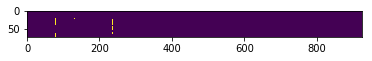

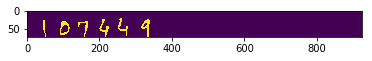

'1O7449'

In [54]:
alphanumeric_extraction('/home/Sandeep/Without_Grid/87609947_WithoutGrid/Alpha Numeric/Chasis Number.jpg', dico, model_alphanum)

In [3]:
# for image_path in glob.glob(os.path.join('/home/Sandeep/','*/*/*/*.jpg')):
#     fname=image_path.split('/')[4].split('.')[0]
#     #print(fname)
#     bname=image_path.split('/')[5].split('.')[0]
#     #print(bname)
#     if  bname=='Alpha Numeric':
#         try:
#             print(alphanumeric_extraction(image_path, dico, model_char))
#         except:
#             pass

In [24]:
os.getcwd()

'/root/bagic_grid'